# Module68 Support Vector Machines Assignment1

Q1. What is the mathematical formula for a linear SVM?

A1. A linear SVM aims to find the hyperplane that separates the data into two classes with the maximum margin. For a linear SVM, the hyperplane is defined as:

``` f(x)  = wT * x + b ```

Where:

w: Weight vector (perpendicular to the hyperplane)

x: Input feature vector

b: Bias term (offset of the hyperplane from the origin)

The decision boundary is defined as:

``` wT * x + b = 0 ```



Q2. What is the objective function of a linear SVM?

A2. The objective function of a linear SVM consists of two parts:

1.) Minimize the norm of the weight vector ||W||2 : This maximizes the margin between the two classes.

2.) Ensure correct classification with a margin: Add constraints to ensure that all data points lie on the correct side of the margin.

The optimization problem is:

``` min(w,b) (1/2 * ||w||^2) ```

Subject to:

``` yi*(wT*xi + b) >= 1, ∀i ```

Here:

yi : Class label (+1 or -1)

xi : Input feature vector

w,b: Parameters to be optimized

For soft-margin SVMs, a slack variable ξi is introduced to allow some misclassification:

```[ min(w,b,ξ) (1/2 * ||w||^2) ] + [C* ∑(from i=1 to N) ξi ]```

Subject to:

``` yi*(wT*xi + b) >= 1 - ξi, ξi >= 0 ```

Where C is a regularization parameter controlling the trade-off between maximizing the margin and minimizing classification errors.



Q3. What is the kernel trick in SVM?

A3. The kernel trick allows SVMs to handle non-linear data by transforming the input space into a higher-dimensional feature space. Instead of computing the transformation explicitly, the kernel trick computes the dot product in the transformed space using a kernel function K(x1, xj).

For example, the kernel function K(x1, xj) replaces xiT * xj  in the optimization problem. Common kernels include:

Linear kernel: K(x1, xj) = xiT * xj

Polynomial kernel: K(x1, xj) = (xiT * xj + 1)^d

Gaussian RBF kernel: K(x1, xj) = exp(-γ||xi-xj||^2)

The kernel trick allows SVMs to find non-linear decision boundaries without explicitly computing the high-dimensional feature space.

Q4. What is the role of support vectors in SVM Explain with example

A4. Support vectors are the data points closest to the decision boundary (hyperplane). They define the margin and influence the orientation and position of the hyperplane. Points farther from the margin do not affect the decision boundary.

**Example:**

1.) Suppose we have two classes of data:
ClassA and ClassB.

2.) The hyperplane is positioned such that the margin (distance between the nearest data points of the two classes) is maximized.

3.) The data points lying on the margin boundaries are the support vectors.

**Role:**

1.) They determine the optimal hyperplane.

2.) The decision boundary depends only on the support vectors, not the other data points.

**For instance:**

If the support vectors are x1, x2, .... , xk, then the hyperplane is computed using only these points.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

A5. Key Concepts

1.) **Hyperplane:** The decision boundary separating the two classes.

2.) **Marginal Plane:** The boundaries of the margin on both sides of the hyperplane.

3.) **Hard Margin:** Assumes perfectly separable data, with no tolerance for misclassification.

4.) **Soft Margin:** Allows some misclassification by introducing slack variables.

I'll create a visualization with clear labels for Hyperplane, Marginal Plane, Soft Margin, and Hard Margin.


1.) **Hard Margin SVM: **

Assumes the data is perfectly separable.

The hyperplane is positioned to maximize the margin without any tolerance for misclassification.

Only the support vectors (circled points) influence the decision boundary.


2.) **Soft Margin SVM: **

Allows for some misclassification.

The margin is wider, and slack variables are introduced for points that are either within the margin or on the wrong side of the decision boundary.


**Key Elements:**

Hyperplane: Solid line dividing the two classes.

Marginal Planes: Dashed lines showing the boundaries of the margin.

Support Vectors: Points closest to the hyperplane (circled).

Soft Margin: Includes misclassified points or points within the margin.

Q6. SVM Implementation through Iris dataset.

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.

~ Train a linear SVM classifier on the training set and predict the labels for the testing set.

~ Compute the accuracy of the model on the testing set.

~ Plot the decision boundaries of the trained model using two of the features.

~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

A6. Follow these steps :-  

1.) Load the Iris dataset from scikit-learn.

2.) Split the data into training and testing sets.

3.) Train a linear SVM classifier and predict labels for the test set.

4.) Compute accuracy.

5.) Plot decision boundaries using two selected features.

6.) Experiment with different regularization parameters C.

7.) Bonus: Implement a linear SVM classifier from scratch and compare performance.

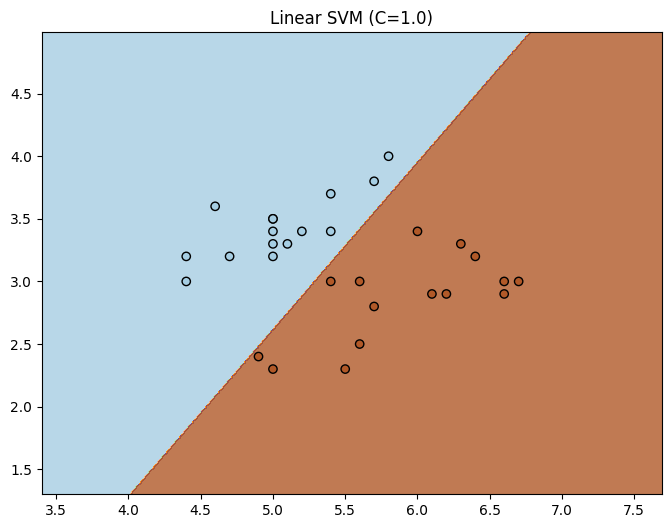

{0.01: 0.8666666666666667, 0.1: 1.0, 1.0: 1.0, 10.0: 1.0, 100.0: 1.0}

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select only two features for visualization
y = iris.target

# Only consider two classes (binary classification for simplicity)
X = X[y != 2]
y = y[y != 2]

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train a linear SVM classifier
svc = SVC(kernel="linear", C=1.0, random_state=42)
svc.fit(X_train, y_train)

# Step 4: Predict the labels for the test set
y_pred = svc.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    ax.set_title(title)

# Plot for default C=1.0
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundaries(X_test, y_test, svc, ax, "Linear SVM (C=1.0)")
plt.show()

# Step 6: Experiment with different values of C
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
accuracy_results = {}

for C in C_values:
    svc = SVC(kernel="linear", C=C, random_state=42)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy_results[C] = accuracy_score(y_test, y_pred)

# Display accuracy results for different C values
accuracy_results
